# Notes
- Just working with the healthcare provider data and trying to put it into one multi-data bar graph

In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_Median_Sale_Price.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_Median_Sale_Price.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)
top_county_df["StateName"] = top_county_df["StateName"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['StateName']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)


In [4]:
# Clean up counties (Bottom)

bottom_county_df["StateName"] = bottom_county_df["StateName"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})

bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['StateName']

bottom_county_clean = bottom_county_df[['County']]

In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

# PCP Rate
primary care physician per 100,000 population

In [6]:
# Get specific health factor data
PCP_rate = health_factor_df[["County", "PCP Rate"]]


In [7]:
# Make merge for plotting
top_PCP = pd.merge(top_county_clean, PCP_rate, on='County', how='left')
bottom_PCP = pd.merge(bottom_county_clean, PCP_rate, on='County', how='left')
all_PCP = pd.merge(bottom_PCP, top_PCP, on=['County','PCP Rate'],how='outer')
top_PCP

,County,PCP Rate
0,"Suffolk, MA",150.0
1,"San Luis Obispo, CA",85.0
2,"Ventura, CA",77.0
3,"Arlington, VA",74.0
4,"King, WA",119.0
5,"Contra Costa, CA",100.0
6,"Monterey, CA",59.0
7,"Westchester, NY",137.0
8,"Sonoma, CA",100.0
9,"Napa, CA",98.0


<BarContainer object of 20 artists>

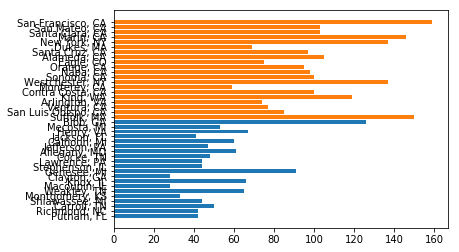

In [8]:
# Plot
plt.barh(bottom_PCP['County'], bottom_PCP['PCP Rate'])
plt.barh(top_PCP['County'], top_PCP['PCP Rate'])

In [9]:
# Run t-test
pop_top_PCP = top_PCP['PCP Rate']
pop_bottom_PCP = bottom_PCP['PCP Rate']
ttest_PCP = stats.ttest_ind(pop_top_PCP, pop_bottom_PCP, equal_var=False)

# Get p-value clean
if ttest_PCP[1] <0.001:
    pvalue_PCP = '{0:.1e}'.format(ttest_PCP[1])
else:
    pvalue_PCP = '{0:.3f}'.format(ttest_PCP[1])
pvalue_PCP

'4.0e-07'

# Dentist Rate
dentist per 100,000 population

In [10]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

,County,Dentist Rate
0,"Autauga, AL",32.0
1,"Baldwin, AL",49.0
2,"Barbour, AL",35.0
3,"Bibb, AL",22.0
4,"Blount, AL",19.0


In [11]:
# Make merge for plotting
top_dentist = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_dentist = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
all_dentist = pd.merge(bottom_dentist, top_dentist, on=['County','Dentist Rate'],how='outer')
all_dentist

,County,Dentist Rate
0,"Putnam, FL",29.0
1,"Richmond, NC",31.0
2,"Carroll, TN",25.0
3,"Shiawassee, MI",44.0
4,"Montgomery, KS",55.0
5,"Weakley, TN",27.0
6,"Macoupin, IL",37.0
7,"Knox, IL",35.0
8,"Clayton, GA",27.0
9,"Genesee, MI",72.0


<BarContainer object of 20 artists>

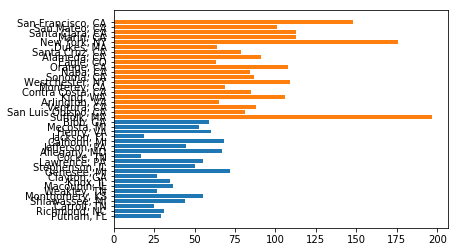

In [12]:
# Plot

plt.barh(bottom_dentist['County'], bottom_dentist['Dentist Rate'])

plt.barh(top_dentist['County'], top_dentist['Dentist Rate'])

In [13]:
# Run t-test
pop_top_dentist = top_dentist['Dentist Rate']
pop_bottom_dentist = bottom_dentist['Dentist Rate']
ttest_dentist = stats.ttest_ind(pop_top_dentist, pop_bottom_dentist, equal_var=False)

# Get p-value clean
if ttest_dentist[1] <0.001:
    pvalue_dentist = '{0:.1e}'.format(ttest_dentist[1])
else:
    pvalue_dentist = '{0:.3f}'.format(ttest_dentist[1])
pvalue_dentist

'5.9e-07'

# MHP Rate
mental health provider per 100,000 population

In [14]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

,County,MHP Rate
0,"Autauga, AL",13.0
1,"Baldwin, AL",89.0
2,"Barbour, AL",8.0
3,"Bibb, AL",9.0
4,"Blount, AL",9.0


In [15]:
# Make merge for plotting

top_MHP = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_MHP = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
all_MHP = pd.merge(bottom_MHP, top_MHP, on=['County','MHP Rate'],how='outer')
all_MHP

,County,MHP Rate
0,"Putnam, FL",54.0
1,"Richmond, NC",134.0
2,"Carroll, TN",28.0
3,"Shiawassee, MI",124.0
4,"Montgomery, KS",208.0
5,"Weakley, TN",30.0
6,"Macoupin, IL",44.0
7,"Knox, IL",94.0
8,"Clayton, GA",59.0
9,"Genesee, MI",251.0


<BarContainer object of 20 artists>

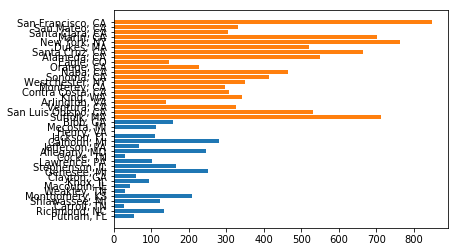

In [16]:
# Plot

plt.barh(bottom_MHP['County'], bottom_MHP['MHP Rate'])

plt.barh(top_MHP['County'], top_MHP['MHP Rate'])

In [17]:
# Run t-test
pop_top_MHP = top_MHP['MHP Rate']
pop_bottom_MHP = bottom_MHP['MHP Rate']
ttest_MHP = stats.ttest_ind(pop_top_MHP, pop_bottom_MHP, equal_var=False)

# Get p-value clean
if ttest_MHP[1] <0.001:
    pvalue_MHP = '{0:.1e}'.format(ttest_MHP[1])
else:
    pvalue_MHP = '{0:.3f}'.format(ttest_MHP[1])
pvalue_MHP

'5.5e-07'

# Multiplot

In [18]:
# full_county_list = pd.merge(bottom_county_clean, top_county_clean, on='County', how='outer')
# plt.barh(all_PCP['County'], all_PCP['PCP Rate'])
# plt.barh(all_dentist['County'], all_dentist['Dentist Rate'])
# plt.barh(all_MHP['County'], all_MHP['MHP Rate'])

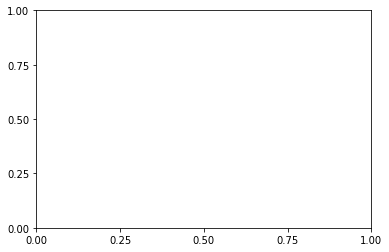

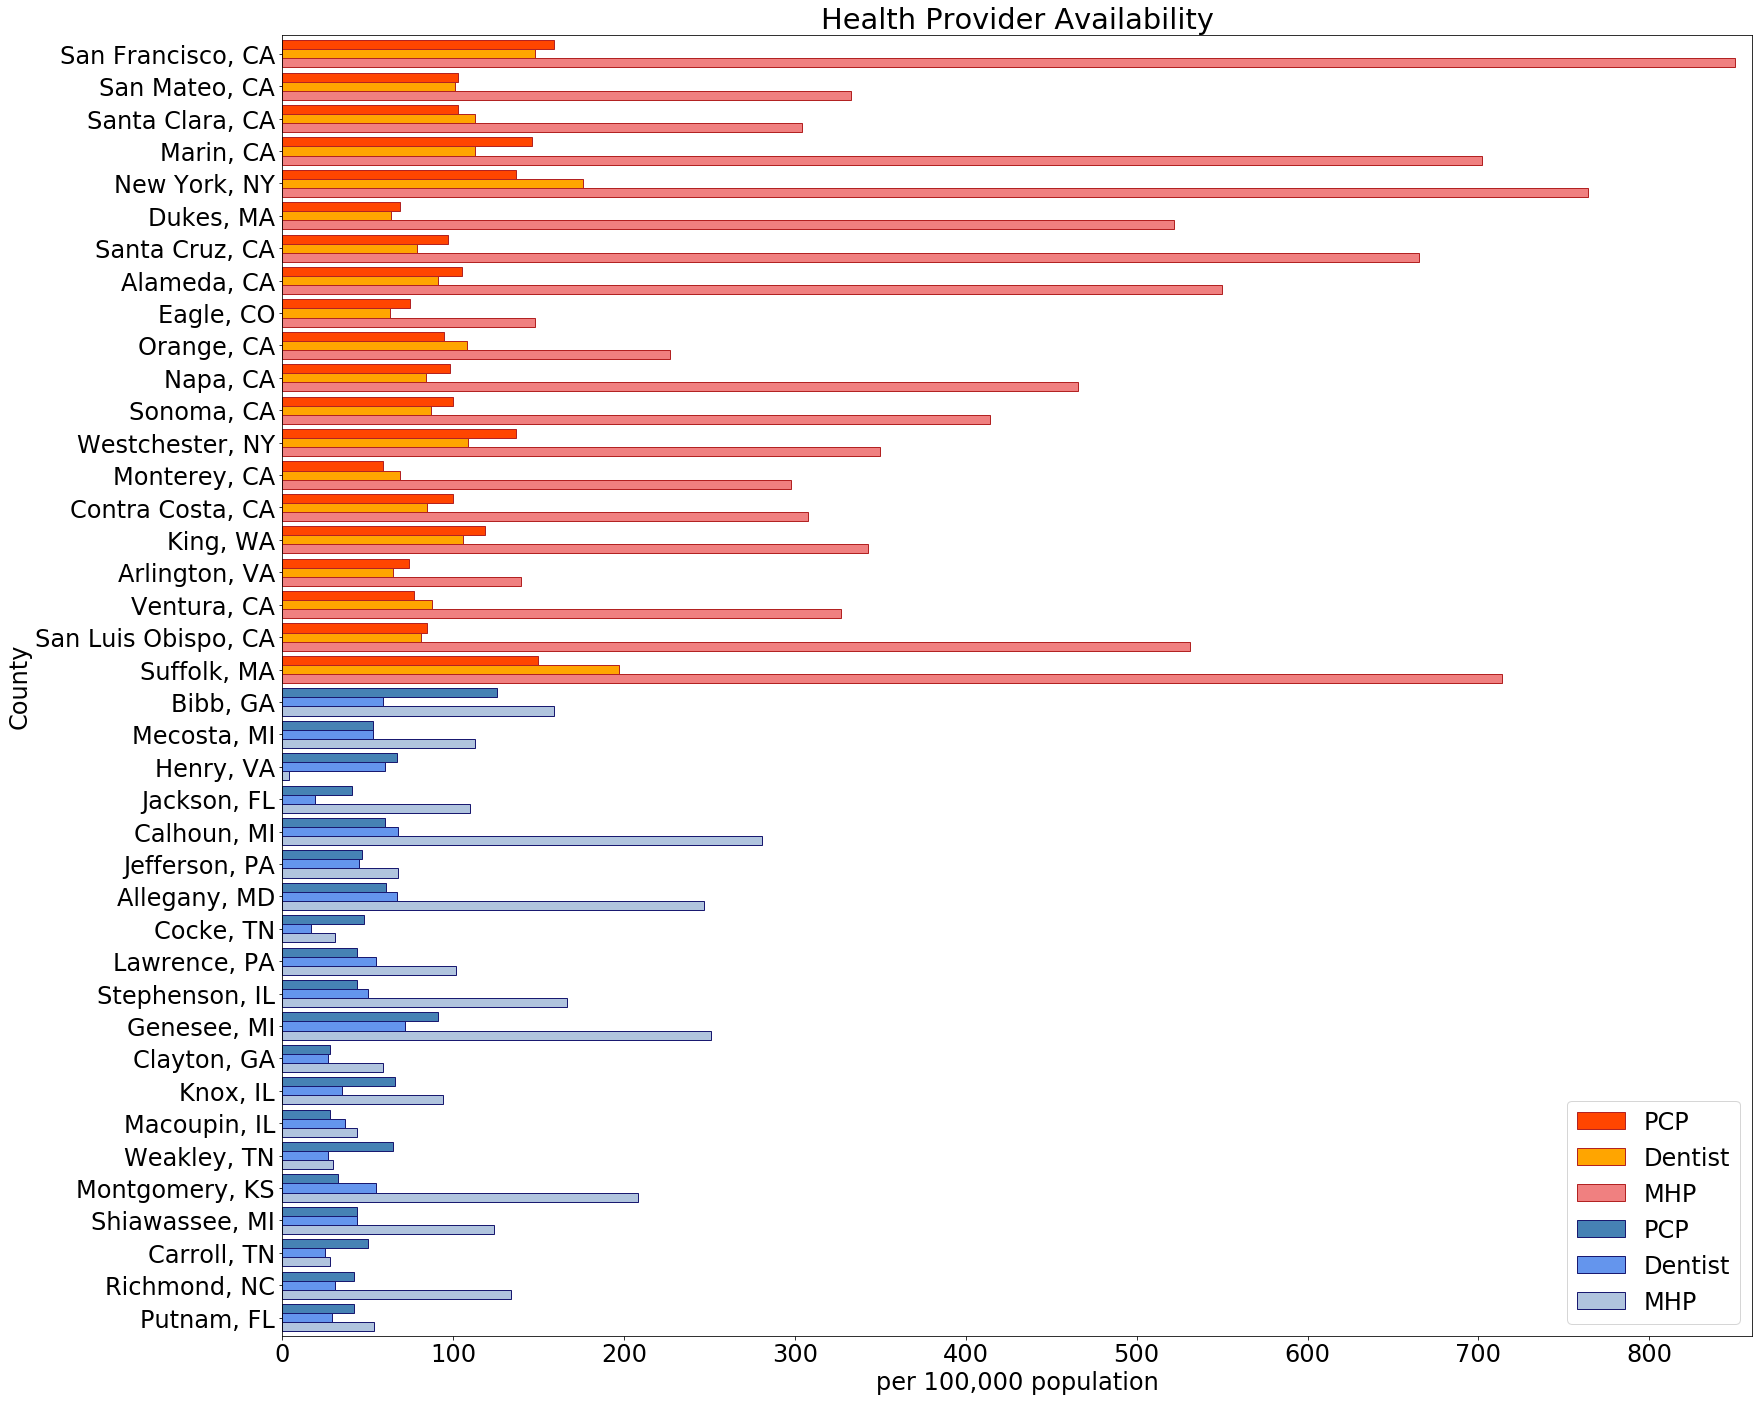

In [19]:
# data to plot
n_groups = 40
PCP_plot = (all_PCP['PCP Rate'])
dentist_plot = (all_dentist['Dentist Rate'])
MHP_plot = (all_MHP['MHP Rate'])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.28
 
plt.figure(figsize=(25,20))  
plt.rcParams.update({'font.size': 24})

mhp_plot = plt.barh(index, MHP_plot, bar_width,
                  alpha=1,
                  color=['lightsteelblue' for _ in range(20)]+['lightcoral' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='MHP')

dentist_plot = plt.barh(index + bar_width, dentist_plot, bar_width,
                  alpha=1,
                  color=['cornflowerblue' for _ in range(20)]+['orange' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='Dentist')

pcp_plot = plt.barh(index + 2*bar_width, PCP_plot, bar_width,
                  alpha=1,
                  color=['steelblue' for _ in range(20)]+['orangered' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='PCP')


plt.ylabel('County')
plt.xlabel('per 100,000 population')
plt.title('Health Provider Availability')
plt.yticks(index + bar_width, (all_PCP['County']))

plt.legend((pcp_plot[20], dentist_plot[20], mhp_plot[20], pcp_plot, dentist_plot, mhp_plot), ("PCP", "Dentist", "MHP", "PCP", "Dentist", "MHP"))

plt.ylim(-0.28,39.87) 
plt.xlim(0,860)
      
plt.tight_layout()
# plt.show()
# plt.savefig("Plots/available_services_by_median_sale_price.png")

# Box and whisker

(-15, 875)

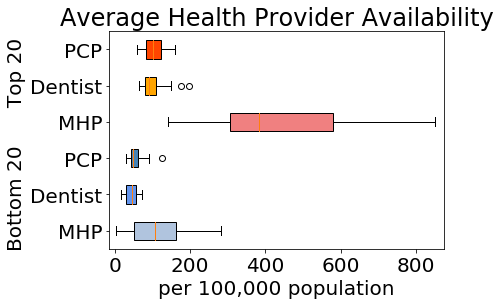

In [20]:

# mpl_fig = plt.figure()
# ax = mpl_fig.add_subplot(111)
all_data = [bottom_MHP['MHP Rate'], bottom_dentist['Dentist Rate'], bottom_PCP['PCP Rate'],
            top_MHP['MHP Rate'],  top_dentist['Dentist Rate'], top_PCP['PCP Rate']]
plt.rcParams.update({'font.size': 20})
boxplot = plt.boxplot(all_data, vert=False, patch_artist=True,labels=['MHP','Dentist','PCP','MHP', 'Dentist', 'PCP'])


colors = ['lightsteelblue', 'cornflowerblue', 'steelblue', 'lightcoral', 'orange', 'orangered']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylabel('Bottom 20      Top 20 ')
plt.xlabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
plt.xlim(-15,875)


(-15, 875)

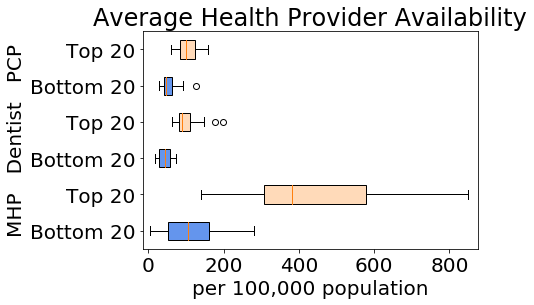

In [21]:

all_data = [bottom_MHP['MHP Rate'], top_MHP['MHP Rate'], 
            bottom_dentist['Dentist Rate'], top_dentist['Dentist Rate'], 
            bottom_PCP['PCP Rate'], top_PCP['PCP Rate']]
plt.rcParams.update({'font.size': 20})
boxplot = plt.boxplot(all_data, vert=False, patch_artist=True,labels=['Bottom 20','Top 20','Bottom 20','Top 20','Bottom 20','Top 20'])


colors = ['cornflowerblue', 'peachpuff', 'cornflowerblue', 'peachpuff', 'cornflowerblue', 'peachpuff']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylabel('MHP   Dentist   PCP')
plt.xlabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
plt.xlim(-15,875)

(array([1, 2, 3, 4]), <a list of 4 Text yticklabel objects>)

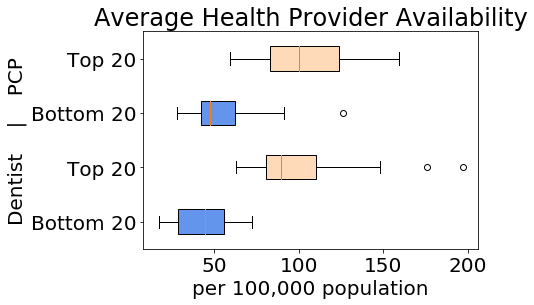

In [22]:

all_data = [bottom_dentist['Dentist Rate'], top_dentist['Dentist Rate'], 
            bottom_PCP['PCP Rate'], top_PCP['PCP Rate']]
plt.rcParams.update({'font.size': 20})
boxplot = plt.boxplot(all_data, vert=False, patch_artist=True,labels=['Bottom 20','Top 20','Bottom 20','Top 20'])


colors = ['cornflowerblue', 'peachpuff', 'cornflowerblue', 'peachpuff']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.ylabel('Dentist    |    PCP')
plt.xlabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
# plt.xlim(-15,875)

(-20, 875)

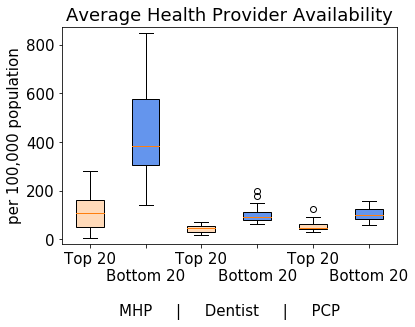

In [23]:

all_data = [bottom_MHP['MHP Rate'], top_MHP['MHP Rate'], 
            bottom_dentist['Dentist Rate'], top_dentist['Dentist Rate'], 
            bottom_PCP['PCP Rate'], top_PCP['PCP Rate']]
plt.rcParams.update({'font.size': 15})
boxplot = plt.boxplot(all_data, vert=True, patch_artist=True,labels=['Top 20','\nBottom 20', 'Top 20','\nBottom 20', 'Top 20','\nBottom 20'])


colors = ['peachpuff', 'cornflowerblue', 'peachpuff', 'cornflowerblue','peachpuff', 'cornflowerblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xlabel('\nMHP     |     Dentist     |     PCP')
plt.ylabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
plt.ylim(-20,875)

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

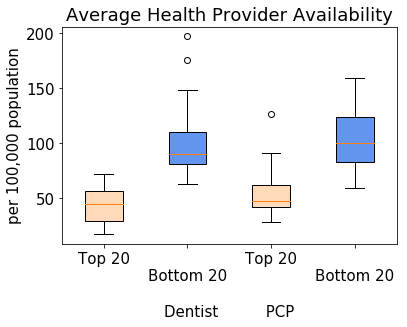

In [24]:

all_data = [bottom_dentist['Dentist Rate'], top_dentist['Dentist Rate'], 
            bottom_PCP['PCP Rate'], top_PCP['PCP Rate']]
plt.rcParams.update({'font.size': 15})
boxplot = plt.boxplot(all_data, vert=True, patch_artist=True,labels=['Top 20','\nBottom 20', 'Top 20','\nBottom 20'])


colors = ['peachpuff', 'cornflowerblue','peachpuff', 'cornflowerblue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xlabel('\nDentist          PCP')
plt.ylabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
# plt.ylim(-20,875)